## 제6장. 머신러닝
## 제2절. 다항 회귀

### 1. scikit-learn의 PolynomialFeatures
* 코드 실습1

In [1]:
import pandas as pd
cereal = pd.read_csv('../data/cereal.csv')
cereal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [2]:
cereal = cereal[cereal.columns[3:]]
cereal =cereal[cereal.sugars >=0]
cereal.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


C:\Users\hw.jung\AppData\Local\Temp\ipykernel_34252\1026542679.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cereal2.sort_values(by=['sugars'], inplace =True)


<function matplotlib.pyplot.show(close=None, block=None)>

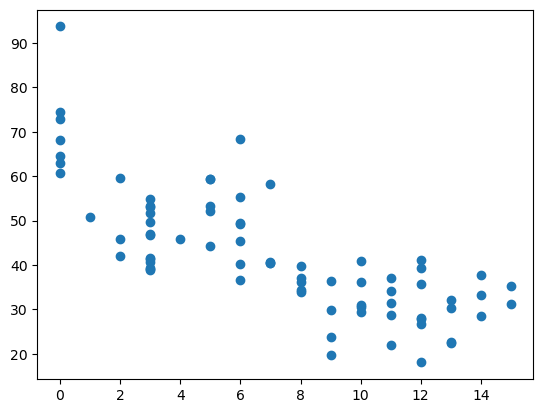

In [35]:
import matplotlib.pyplot as plt
cereal2 = cereal[['sugars', 'rating']]
cereal2.sort_values(by=['sugars'], inplace =True)
cereal2.reset_index(drop=True, inplace =True)
x=cereal2['sugars'].values
y=cereal2['rating'].values
plt.scatter(x,y)
plt.show

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size =0.3, random_state =1)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(53,) (23,)
(53,) (23,)


In [5]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=2)
X_poly=poly_reg.fit_transform(X_train.reshape(-1,1))

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_poly, y_train)

LinearRegression()

In [18]:
y_train.shape

(53,)

In [24]:
import numpy as np
X_test_poly=poly_reg.transform(X_test.reshape(-1,1))
pred=reg.predict(X_test_poly)

np.set_printoptions(precision=2) # 소수점 둘째자리까지 표현
print(np.concatenate((pred.reshape(len(pred),1), y_test.reshape(len(y_test),1)),axis=1))

[[51.63 46.66]
 [32.1  28.74]
 [55.79 59.64]
 [31.08 37.84]
 [32.1  31.44]
 [44.46 44.33]
 [38.82 40.4 ]
 [41.45 55.33]
 [41.45 49.12]
 [31.38 27.75]
 [36.56 34.38]
 [34.7  29.92]
 [65.25 63.01]
 [33.21 31.07]
 [44.46 52.08]
 [38.82 40.45]
 [51.63 53.13]
 [36.56 33.98]
 [41.45 49.51]
 [31.04 22.74]
 [31.38 39.26]
 [31.5  31.23]
 [32.1  21.87]]


In [25]:
reg.intercept_, reg.coef_

(65.25223713305854, array([ 0.  , -5.11,  0.19]))

In [32]:
x1=np.linspace(0,15,100).reshape(100,1)

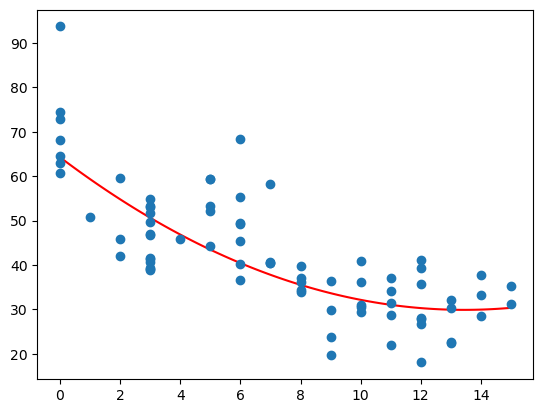

In [36]:
plt.plot(x1, 64.25 +  -5.11 * x1 + 0.19 * x1 * x1, 'r-')
plt.plot(x,y,'o')
plt.plot()
plt.show()

In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_error
mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
rmse = np.sqrt(mse)
acc = reg.score(poly_reg.transform(X_test.reshape(-1,1)), y_test)
print('MSE\t{}'.format(round(mse,3)))
print('MAE\t{}'.format(round(mae,3)))
print('RMSE\t{}'.format(round(rmse,3)))
print('ACC\t{}%'.format(round(acc *100,3)))

MSE	33.565
MAE	4.606
RMSE	5.794
ACC	74.376%


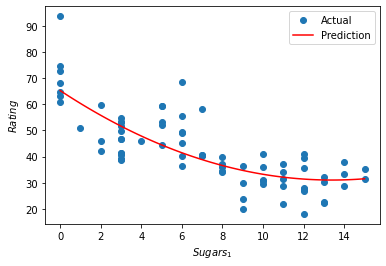

In [8]:
X_new=np.linspace(0,15,100).reshape(100,1)
X_new_poly=poly_reg.transform(X_new)
y_new = reg.predict(X_new_poly)

plt.plot(x,y, 'o', label ='Actual')
plt.plot(X_new, y_new, 'r-', label ='Prediction')
plt.legend(loc='upper right')
plt.xlabel('$Sugars_1$')
plt.ylabel('$Rating$')
plt.show()

* 코드 실습2

In [37]:
X = cereal.iloc[:,:-1].values
y = cereal.iloc[:,-1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state =1)
print (X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(53, 12) (23, 12) (53,) (23,)


In [38]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)

from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)

from sklearn.linear_model import LinearRegression
X_poly = poly_reg.fit_transform(X_train)
reg = LinearRegression()
reg.fit(X_poly, y_train)

LinearRegression()

In [39]:
import numpy as np
X_test_poly = poly_reg.transform(X_test)
pred = reg.predict(X_test_poly)

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_error
mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
rmse = np.sqrt(mse)
acc = reg.score(poly_reg.transform(X_test), y_test)
print('MSE\t{}'.format(round(mse,3)))
print('MAE\t{}'.format(round(mae,3)))
print('RMSE\t{}'.format(round(rmse,3)))
print('ACC\t{}%'.format(round(acc *100,3)))

MSE	9.594
MAE	2.134
RMSE	3.097
ACC	92.642%


In [40]:
X_new=np.linspace(0,15,100).reshape(100,1)
X_new_poly=poly_reg.transform(X_new)
y_new = reg.predict(X_new_poly)

plt.plot(x,y, 'o', label ='Actual')
plt.plot(X_new, y_new, 'r-', label ='Prediction')
plt.legend(loc='upper right')
plt.xlabel('$Sugars_1$')
plt.ylabel('$Rating$')
plt.show()

ValueError: X has 1 features, but PolynomialFeatures is expecting 12 features as input.